In [2]:
import pandas as pd
import numpy as np

In [3]:
df_prod=pd.read_csv('C:\\Users\\p860n111\\Desktop\\data science\\HW-5-Product-demand-data-set\\Historical Product Demand.csv')

In [4]:
# so we can see that only Date column has missing values
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1048575 non-null object
Warehouse           1048575 non-null object
Product_Category    1048575 non-null object
Date                1037336 non-null object
Order_Demand        1048575 non-null object
dtypes: object(5)
memory usage: 40.0+ MB


In [5]:
# There are total 2160 unique products.
# The most popular product is Product_1359 with 16936 frequency.
# Only 4 unqique warehouses
# All in all total 33 unique Product_Category

df_prod.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [6]:
# to handle missing attribute, dropping the NA values for date field so, now we have 1037336 entries/records.
df_prod=df_prod.dropna()

In [9]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1037336 non-null object
Warehouse           1037336 non-null object
Product_Category    1037336 non-null object
Date                1037336 non-null object
Order_Demand        1037336 non-null object
dtypes: object(5)
memory usage: 47.5+ MB


In [10]:
df_prod.shape

(1037336, 5)

In [11]:
len(df_prod['Product_Code'].unique())

2160

In [12]:
len(df_prod['Warehouse'].unique())

4

In [13]:
# so we have 2160 prodtcs across 33 different categories
len(df_prod['Product_Category'].unique())

33

In [14]:
len(df_prod['Date'].unique())

1729

In [15]:
dates = [pd.to_datetime(date) for date in df_prod['Date']]
dates.sort()

In [16]:
# date of first order:  8th January 2011
dates[0]

Timestamp('2011-01-08 00:00:00')

In [17]:
# date of last  order:  9th January 2017
dates[-1]

Timestamp('2017-01-09 00:00:00')

In [19]:
#addtiomnal info1: To find number of products that belong to each category.
df_prod.groupby(['Product_Category' ]).count()['Product_Code']

Product_Category
Category_001     97787
Category_002        77
Category_003      4189
Category_004       329
Category_005    101627
Category_006     35552
Category_007     82402
Category_008      1560
Category_009     19738
Category_010       976
Category_011     23208
Category_012      1147
Category_013      3743
Category_014        26
Category_015     22954
Category_016        37
Category_017       615
Category_018      5239
Category_019    470266
Category_020      3490
Category_021     52008
Category_022      8657
Category_023      7899
Category_024     20885
Category_025        35
Category_026     14771
Category_027        26
Category_028     31012
Category_029       671
Category_030     12997
Category_031      2268
Category_032      9296
Category_033      1849
Name: Product_Code, dtype: int64

In [20]:
df_prod_ProductPerCategory=df_prod.groupby(['Product_Category' ]).count()['Product_Code']
df_prod_ProductPerCategory= df_prod_ProductPerCategory.to_frame()
df_prod_ProductPerCategory.head()

,Product_Code
Product_Category,
Category_001,97787
Category_002,77
Category_003,4189
Category_004,329
Category_005,101627


In [22]:
df_prod_ProductPerCategory=df_prod_ProductPerCategory.sort_values('Product_Code',ascending=False)

In [23]:
df_prod_ProductPerCategory.head(10)

,Product_Code
Product_Category,
Category_019,470266
Category_005,101627
Category_001,97787
Category_007,82402
Category_021,52008
Category_006,35552
Category_028,31012
Category_011,23208
Category_015,22954


In [24]:
df_prod_ProductPerCategory

,Product_Code
Product_Category,
Category_019,470266
Category_005,101627
Category_001,97787
Category_007,82402
Category_021,52008
Category_006,35552
Category_028,31012
Category_011,23208
Category_015,22954


In [25]:
df_prod_ProductPerCategory = df_prod_ProductPerCategory.rename(columns={'Product_Code': 'Number of Products'})

In [26]:
df_prod_ProductPerCategory.head(10)

,Number of Products
Product_Category,
Category_019,470266
Category_005,101627
Category_001,97787
Category_007,82402
Category_021,52008
Category_006,35552
Category_028,31012
Category_011,23208
Category_015,22954


In [29]:
from PIL import Image
#Matplot to visualize data, also Seaborn and pandas do this
import matplotlib.pyplot as plt
import seaborn as sns
# Inline to show images in jupyter notebook
%matplotlib inline
plt.figure(figsize=(15,15))
ax = sns.barplot(x='Number of Products',y='Product_Category',data=df_prod_ProductPerCategory)
ax.set(xlabel='Category of product', ylabel='Number of Products')
plt.show()

ValueError: Could not interpret input 'Product_Category'

<Figure size 1080x1080 with 0 Axes>

In [32]:
df_prod_ProductPerCategory['Product_Category'] = df_prod_ProductPerCategory.index.tolist()
df_prod_ProductPerCategory.columns = ['Number of Products','Product_Category']
df_prod_ProductPerCategory.index= np.arange(0,len(df_prod_ProductPerCategory))
df_prod_ProductPerCategory

,Number of Products,Product_Category
0,470266,Category_019
1,101627,Category_005
2,97787,Category_001
3,82402,Category_007
4,52008,Category_021
5,35552,Category_006
6,31012,Category_028
7,23208,Category_011
8,22954,Category_015
9,20885,Category_024


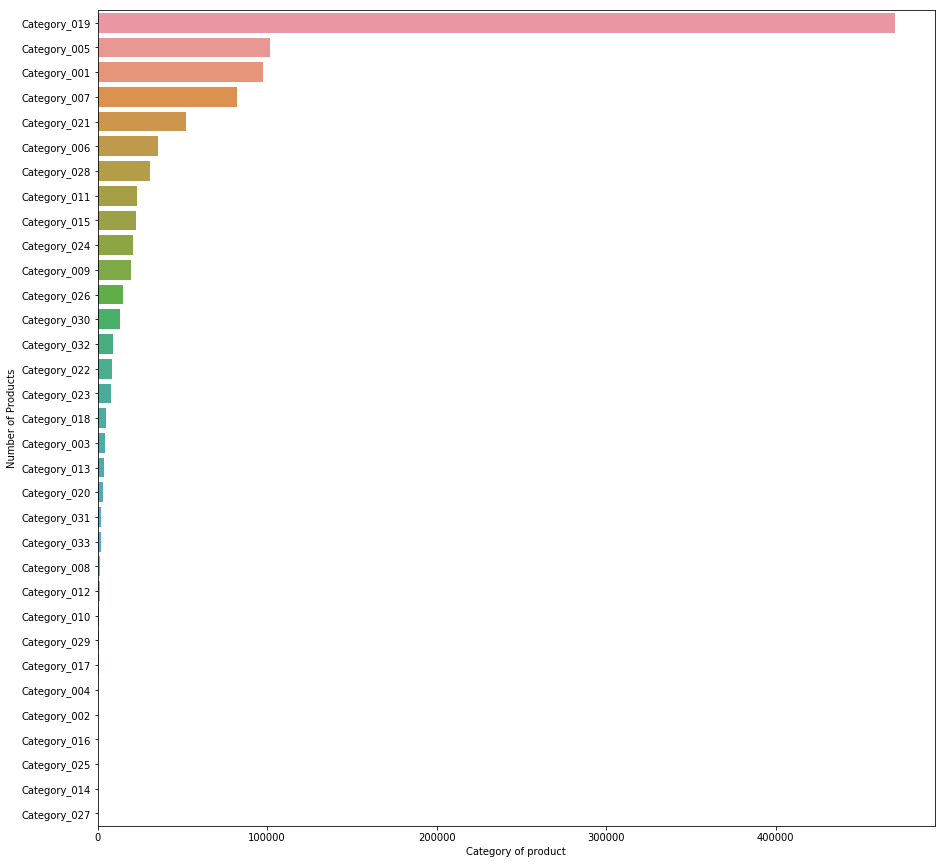

In [35]:
# Visualization: category versus number of products belong to each category
from PIL import Image
#Matplot to visualize data, also Seaborn and pandas do this
import matplotlib.pyplot as plt
import seaborn as sns
# Inline to show images in jupyter notebook
%matplotlib inline
plt.figure(figsize=(15,15))
ax = sns.barplot(x='Number of Products',y='Product_Category',data=df_prod_ProductPerCategory)
ax.set(xlabel='Category of product', ylabel='Number of Products')
plt.show()

In [39]:
df_prod_ProductPerCategory.to_csv('AdditionalInfo#1_NoOfProductEachCategory.csv', sep=',')


In [40]:
#addtiomnal info2: To find number of product category that belong to each warehouse.
df_prod.groupby(['Warehouse' ]).count()['Product_Category']

Warehouse
Whse_A    142335
Whse_C     42354
Whse_J    764447
Whse_S     88200
Name: Product_Category, dtype: int64

In [62]:
df_prod_CategoryPerWHouse=df_prod.groupby(['Warehouse' ]).count()['Product_Category'].unique()
df_prod_CategoryPerWHouse= df_prod_CategoryPerWHouse.to_frame()
df_prod_CategoryPerWHouse.head()

,Product_Category
Warehouse,
Whse_A,142335
Whse_C,42354
Whse_J,764447
Whse_S,88200


In [63]:
df_prod_CategoryPerWHouse['Warehouse'] = df_prod_CategoryPerWHouse.index.tolist()
df_prod_CategoryPerWHouse.columns = ['Number of Products','Product_Category']
df_prod_CategoryPerWHouse.index= np.arange(0,len(df_prod_CategoryPerWHouse))
df_prod_CategoryPerWHouse

,Number of Products,Product_Category
0,142335,Whse_A
1,42354,Whse_C
2,764447,Whse_J
3,88200,Whse_S


In [55]:
df_prod_CategoryPerWHouse.head()

,Number of Products,Product_Category
0,142335,Whse_A
1,42354,Whse_C
2,764447,Whse_J
3,88200,Whse_S


In [54]:
df_prod_CategoryPerWHouse.drop(['Warehouse'], axis = 1, inplace = True, errors = 'ignore')

In [64]:
df_prod_CategoryPerWHouse = df_prod_CategoryPerWHouse.rename(columns={'Number of Products': 'Number of Categories'})

In [65]:
df_prod_CategoryPerWHouse = df_prod_CategoryPerWHouse.rename(columns={'Product_Category': 'Warehouse'})

In [66]:
df_prod_CategoryPerWHouse.head()

,Number of Categories,Warehouse
0,142335,Whse_A
1,42354,Whse_C
2,764447,Whse_J
3,88200,Whse_S


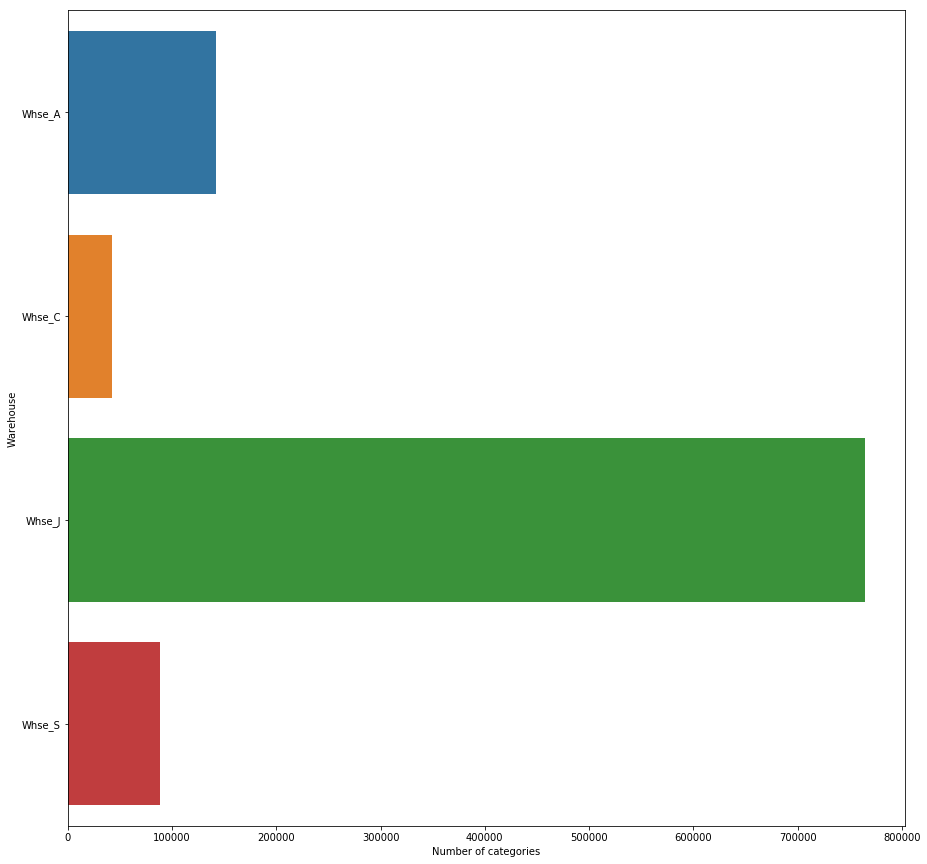

In [68]:
# Visualization 2: categories versus warehouses
plt.figure(figsize=(15,15))
ax = sns.barplot(x='Number of Categories',y='Warehouse',data=df_prod_CategoryPerWHouse)
ax.set(xlabel='Number of categories', ylabel='Warehouse')
plt.show()

In [69]:
df_prod.groupby(['Warehouse','Product_Category']).count()['Product_Code']

Warehouse  Product_Category
Whse_A     Category_001          127
           Category_003         1941
           Category_005         1519
           Category_006         3920
           Category_007        15058
           Category_008          168
           Category_009         7480
           Category_010          737
           Category_011          799
           Category_012          213
           Category_013         1118
           Category_015         5688
           Category_016           18
           Category_017          245
           Category_018         2633
           Category_019        62557
           Category_021        13586
           Category_022          979
           Category_023          340
           Category_024         6694
           Category_026         3345
           Category_027           26
           Category_028        11158
           Category_029          671
           Category_031         1315
Whse_C     Category_001         2177
          

In [78]:
df_prod.groupby(['Warehouse' ]).count()['Product_Category']


Warehouse
Whse_A    142335
Whse_C     42354
Whse_J    764447
Whse_S     88200
Name: Product_Category, dtype: int64

In [81]:
#AdditionalInformation3: For each Warehouse to find corresponsing Product_Category and for each product category
#find total product. 
df_prod.groupby(['Warehouse','Product_Category']).count()['Product_Code']


Warehouse  Product_Category
Whse_A     Category_001          127
           Category_003         1941
           Category_005         1519
           Category_006         3920
           Category_007        15058
           Category_008          168
           Category_009         7480
           Category_010          737
           Category_011          799
           Category_012          213
           Category_013         1118
           Category_015         5688
           Category_016           18
           Category_017          245
           Category_018         2633
           Category_019        62557
           Category_021        13586
           Category_022          979
           Category_023          340
           Category_024         6694
           Category_026         3345
           Category_027           26
           Category_028        11158
           Category_029          671
           Category_031         1315
Whse_C     Category_001         2177
          

In [82]:
# Now converting the above data into a frame (playWise_lines_per_player).

df_prod_WHouse_Category_product= df_prod.groupby(['Warehouse','Product_Category']).count()['Product_Code']
df_prod_WHouse_Category_product= df_prod_WHouse_Category_product.to_frame()
df_prod_WHouse_Category_product

Product_Code
Warehouse Product_Category              
Whse_A    Category_001               127
          Category_003              1941
          Category_005              1519
          Category_006              3920
          Category_007             15058

In [86]:
df_prod_WHouse_Category_product
df_prod_WHouse_Category_product.to_csv('AdditionalInfo#3_WHouse_Category_product.csv', sep=',')

In [85]:
df_prod_WHouse_Category_product

Product_Code
Warehouse Product_Category              
Whse_A    Category_001               127
          Category_003              1941
          Category_005              1519
          Category_006              3920
          Category_007             15058
          Category_008               168
          Category_009              7480
          Category_010               737
          Category_011               799
          Category_012               213
          Category_013              1118
          Category_015              5688
          Category_016                18
          Category_017               245
          Category_018              2633
          Category_019             62557
          Category_021             13586
          Category_022               979
          Category_023               340
          Category_024              6694
          Category_026              3345
          Category_027                26
          Category_028             11158
          Category_029               671
          Category_031              1315
Whse_C    Category_001              2177
          Category_005              3776
          Category_006               947
          Category_007              5934
          Category_008                19
...                                  ...
Whse_J    Category_032              5874
          Category_033              1849
Whse_S    Category_001              2470
          Category_002                77
          Category_003               849
          Category_004               329
          Category_005              5117
          Category_006              3152
          Category_007              6218
          Category_009              6547
          Category_010                36
          Category_011               944
          Category_012               407
          Category_013               292
          Category_014                26
          Category_015              4123
          Category_016                19
          Category_017                19
          Category_018               674
          Category_019             21564
          Category_020              3442
          Category_021              5380
          Category_022              5900
          Category_023              2076
          Category_024              4299
          Category_025                35
          Category_026               592
          Category_028              1845
          Category_030              8548
          Category_032              3220

[94 rows x 1 columns]

In [87]:
#addtiomnal info4: To find the date on which maximum and minimum orders where placed.
df_prod.groupby(['Date' ]).count()['Order_Demand']

Date
2011/1/8        1
2011/10/20      2
2011/10/31      1
2011/11/18      7
2011/11/21      4
2011/11/22      3
2011/11/23      2
2011/11/24      3
2011/11/25      2
2011/11/28      1
2011/11/29      6
2011/11/30      1
2011/11/4       2
2011/12/1       3
2011/12/12     12
2011/12/13     16
2011/12/14     10
2011/12/15     23
2011/12/16     27
2011/12/19     22
2011/12/2       1
2011/12/20     39
2011/12/21     55
2011/12/22     54
2011/12/23     25
2011/12/25      5
2011/12/26     67
2011/12/27     59
2011/12/28     46
2011/12/29     35
             ... 
2016/9/13     729
2016/9/14     650
2016/9/15     685
2016/9/16     688
2016/9/17       4
2016/9/18      10
2016/9/19     200
2016/9/2      759
2016/9/20     744
2016/9/21     859
2016/9/22     164
2016/9/23     916
2016/9/26     867
2016/9/27     719
2016/9/28     662
2016/9/29     732
2016/9/3        1
2016/9/30     880
2016/9/4        1
2016/9/5      789
2016/9/6      690
2016/9/7      700
2016/9/8      723
2016/9/9      653
2017/

In [92]:
df_prod_OrderPerDay=df_prod.groupby(['Date' ]).count()['Order_Demand']
df_prod_OrderPerDay= df_prod_OrderPerDay.to_frame()
df_prod_OrderPerDay=df_prod_OrderPerDay.sort_values('Order_Demand',ascending=False)
df_prod_OrderPerDay.head()

,Order_Demand
Date,
2013/9/27,2075
2013/10/25,1920
2013/10/30,1899
2013/10/28,1850
2014/1/6,1286


In [93]:
# so from from above result we can conclude that on 2013/9/27, maximum of 2075 orders were demand.

df_prod_OrderPerDay['Date'] = df_prod_OrderPerDay.index.tolist()
df_prod_OrderPerDay.columns = ['Order_Demand','Date']
df_prod_OrderPerDay.index= np.arange(0,len(df_prod_OrderPerDay))
df_prod_OrderPerDay

,Order_Demand,Date
0,2075,2013/9/27
1,1920,2013/10/25
2,1899,2013/10/30
3,1850,2013/10/28
4,1286,2014/1/6
5,1270,2014/4/1
6,1264,2012/10/1
7,1258,2014/2/10
8,1256,2014/11/4
9,1222,2013/10/1


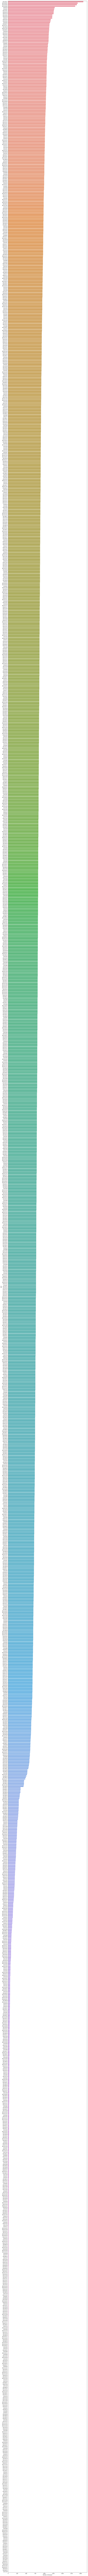

In [98]:
# Visualization 3: Date wise order demand distribution
plt.figure(figsize=(15,500))
ax = sns.barplot(x='Order_Demand',y='Date',data=df_prod_OrderPerDay)
ax.set(xlabel='Number of Demand ', ylabel='date')
plt.show()

In [99]:
df_prod_OrderPerDay.to_csv('AdditionalInfo#4_Demans_order_per_day.csv', sep=',')

In [128]:
#Additiomnal info5: to access/get date, month and year information from date column
df_prod_new= df_prod

In [129]:
df_prod_new.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month,date
0,Product_0993,Whse_J,Category_028,2012/7/27,100,2012,7,27
1,Product_0979,Whse_J,Category_028,2012/1/19,500,2012,1,19
2,Product_0979,Whse_J,Category_028,2012/2/3,500,2012,2,3
3,Product_0979,Whse_J,Category_028,2012/2/9,500,2012,2,9
4,Product_0979,Whse_J,Category_028,2012/3/2,500,2012,3,2


In [130]:
#created 3 new column for year month and date
df_prod_new['year'] = pd.DatetimeIndex(df_nba_elo_new['Date']).year
df_prod_new['month'] = pd.DatetimeIndex(df_nba_elo_new['Date']).month
df_prod_new['date'] = pd.DatetimeIndex(df_nba_elo_new['Date']).day

In [131]:
df_prod_new.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month,date
0,Product_0993,Whse_J,Category_028,2012/7/27,100,2012,7,27
1,Product_0979,Whse_J,Category_028,2012/1/19,500,2012,1,19
2,Product_0979,Whse_J,Category_028,2012/2/3,500,2012,2,3
3,Product_0979,Whse_J,Category_028,2012/2/9,500,2012,2,9
4,Product_0979,Whse_J,Category_028,2012/3/2,500,2012,3,2


In [141]:
#Additiomnal info#6: The year in which maximum number of orders were demanded
df_prod_new_Year=df_prod_new.groupby(['year']).count()['Order_Demand']

In [142]:
df_prod_new_Year.head()

year
2011       640
2012    203635
2013    218298
2014    216404
2015    209661
Name: Order_Demand, dtype: int64

In [143]:
df_prod_new_Year= df_prod_new_Year.to_frame()
df_prod_new_Year['year'] = df_prod_new_Year.index.tolist()
df_prod_new_Year.columns = ['Number of product demand in year','year']
df_prod_new_Year.index= np.arange(0,len(df_prod_new_Year))
df_prod_new_Year.head()



,Number of product demand in year,year
0,640,2011
1,203635,2012
2,218298,2013
3,216404,2014
4,209661,2015


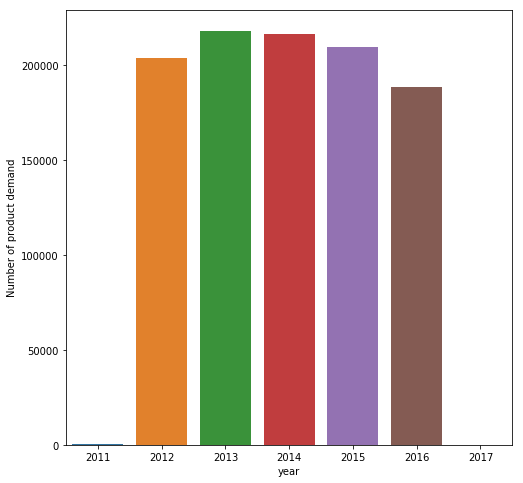

In [148]:
# Visualization : year wise demand plot
plt.figure(figsize=(8,8))
ax = sns.barplot(x='year',y='Number of product demand in year',data=df_prod_new_Year)
ax.set(xlabel='year', ylabel='Number of product demand')
plt.show()

In [153]:
#Additiomnal info#7: The month in which maximum number of deamnds were there.
df_prod_new_Month=df_prod_new.groupby(['month']).count()['Order_Demand']
df_prod_new_Month.head()
df_prod_new_Month= df_prod_new_Month.to_frame()

#df_prod_new_Month = df_prod_new_Month.rename(columns={'team1': 'Number of Matches Played'})
#df_prod_new_Month = df_prod_new_Month.rename(columns={'team1': 'Number of Matches Played'})
df_prod_new_Month=df_prod_new_Month.sort_values('Order_Demand',ascending=False)
df_prod_new_Month

,Order_Demand
month,
10,96619
3,92244
7,90116
11,88220
2,87702
6,85927
9,85565
4,85178
1,83079


In [154]:
df_prod_new_Month['month'] = df_prod_new_Month.index.tolist()
df_prod_new_Month.columns = ['Number of product demand in year','month']
df_prod_new_Month.index= np.arange(0,len(df_prod_new_Month))
df_prod_new_Month.head()

,Number of product demand in year,month
0,96619,10
1,92244,3
2,90116,7
3,88220,11
4,87702,2


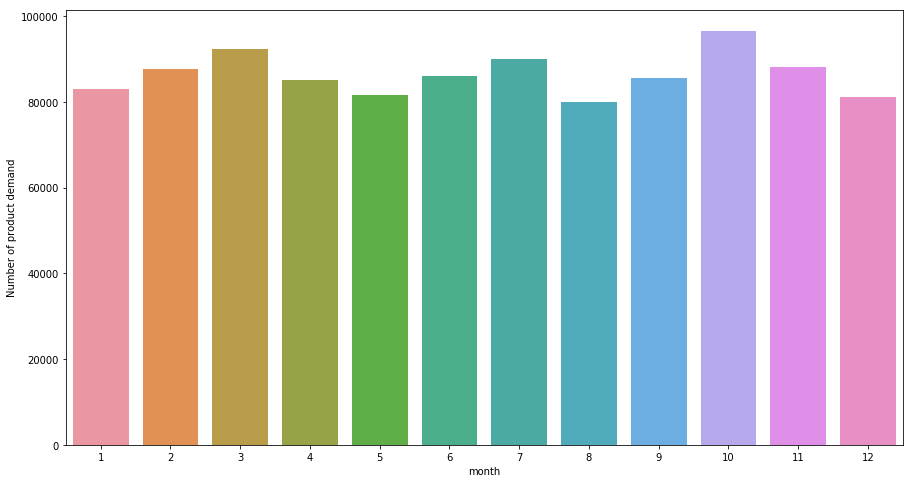

In [157]:
# Visualization : month wise demand plot
plt.figure(figsize=(15,8))
ax = sns.barplot(x='month',y='Number of product demand in year',data=df_prod_new_Month)
ax.set(xlabel='month', ylabel='Number of product demand')
plt.show()

In [158]:
#Additiomnal info#8: The date in which maximum number of demands were there.
df_prod_new_date=df_prod_new.groupby(['date']).count()['Order_Demand']
df_prod_new_date.head()
df_prod_new_date= df_prod_new_date.to_frame()

#df_prod_new_Month = df_prod_new_Month.rename(columns={'team1': 'Number of Matches Played'})
#df_prod_new_Month = df_prod_new_Month.rename(columns={'team1': 'Number of Matches Played'})
df_prod_new_date=df_prod_new_date.sort_values('Order_Demand',ascending=False)
df_prod_new_date

,Order_Demand
date,
1,38057
25,37015
21,36081
9,35800
5,35567
17,35375
8,35374
22,35212
7,35131


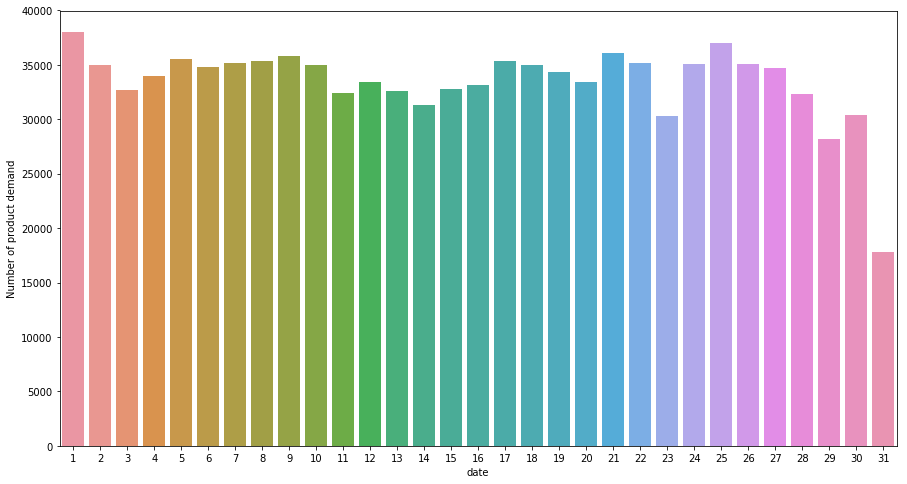

In [160]:
df_prod_new_date['date'] = df_prod_new_date.index.tolist()
df_prod_new_date.columns = ['Number of product demand in year','date']
df_prod_new_date.index= np.arange(0,len(df_prod_new_date))
df_prod_new_date.head()
# Visualization : date wise demand plot
plt.figure(figsize=(15,8))
ax = sns.barplot(x='date',y='Number of product demand in year',data=df_prod_new_date)
ax.set(xlabel='date', ylabel='Number of product demand')
plt.show()

## end of additional information and EDA

In [162]:
df_prod_new.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month,date
0,Product_0993,Whse_J,Category_028,2012/7/27,100,2012,7,27
1,Product_0979,Whse_J,Category_028,2012/1/19,500,2012,1,19
2,Product_0979,Whse_J,Category_028,2012/2/3,500,2012,2,3
3,Product_0979,Whse_J,Category_028,2012/2/9,500,2012,2,9
4,Product_0979,Whse_J,Category_028,2012/3/2,500,2012,3,2


In [163]:
df_prod_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 8 columns):
Product_Code        1037336 non-null object
Warehouse           1037336 non-null object
Product_Category    1037336 non-null object
Date                1037336 non-null object
Order_Demand        1037336 non-null object
year                1037336 non-null int64
month               1037336 non-null int64
date                1037336 non-null int64
dtypes: int64(3), object(5)
memory usage: 71.2+ MB


In [165]:
df_prod_new.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
year                 int64
month                int64
date                 int64
dtype: object

In [71]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [57]:
df_prod

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


In [60]:
#There are several warehouses in the dataset, we start from time series analysis and forecasting for Warehouse: Whse_A.
warehouseA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142335 entries, 34593 to 995801
Data columns (total 5 columns):
Product_Code        142335 non-null object
Warehouse           142335 non-null object
Product_Category    142335 non-null object
Date                142335 non-null object
Order_Demand        142335 non-null object
dtypes: object(5)
memory usage: 6.5+ MB


In [59]:
warehouseA = df_prod.loc[df_prod['Warehouse'] == 'Whse_A']



In [61]:
warehouseA.shape
from datetime import datetime
warehouseA['Date']=pd.to_datetime(warehouseA['Date'])
warehouseA.head()

C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
34593,Product_0905,Whse_A,Category_023,2012-03-07,50
41029,Product_0097,Whse_A,Category_019,2012-01-18,6000
41030,Product_1496,Whse_A,Category_019,2012-03-13,5000
41031,Product_0097,Whse_A,Category_019,2012-04-16,6000
41032,Product_0097,Whse_A,Category_019,2012-09-24,3900


In [64]:
# to find the minimum and maximum date
warehouseA['Date'].min(), warehouseA['Date'].max()
warehouseA.isnull().sum()

Date            0
Order_Demand    0
dtype: int64

In [63]:
cols = ['Product_Code', 'Warehouse', 'Product_Category']
warehouseA.drop(cols, axis=1, inplace=True)
warehouseA.info()
warehouseA.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 142335 entries, 34593 to 995801
Data columns (total 2 columns):
Date            142335 non-null datetime64[ns]
Order_Demand    142335 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 3.3+ MB


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,Order_Demand
34593,2012-03-07,50
41029,2012-01-18,6000
41030,2012-03-13,5000
41031,2012-04-16,6000
41032,2012-09-24,3900


In [65]:
# since 911 records have negative value from order_demand so converting the order demand to be of float column from object type
# and then removing the negative value records so 911 removed 
cols = ['Order_Demand']
warehouseA[cols] = warehouseA[cols].apply(lambda x: pd.to_numeric(x.astype(str)
                                                   .str.replace(',',''), errors='coerce'))
# to handle missing attribute, dropping the NA values for date field so, now we have 1037336 entries/records.
warehouseA=warehouseA.dropna()
#warehouseA = warehouseA.sort_values('Date')

#warehouseA.head()


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [66]:
warehouseA = warehouseA.groupby('Date')['Order_Demand'].sum().reset_index()

In [67]:
warehouseA.info()
warehouseA=warehouseA.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 2 columns):
Date            1575 non-null datetime64[ns]
Order_Demand    1575 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.7 KB


In [68]:
 warehouseA = warehouseA.set_index('Date')
warehouseA.index

DatetimeIndex(['2011-01-08', '2011-05-31', '2011-11-18', '2011-11-21',
               '2011-11-22', '2011-11-23', '2011-11-24', '2011-11-28',
               '2011-11-29', '2011-11-30',
               ...
               '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1575, freq=None)

In [34]:
from datetime import datetime
warehouseA['Date']=pd.to_datetime(warehouseA['Date'])

In [35]:
warehouseA.head()


,Date,Order_Demand
0,2011-01-08,2.0
1,2011-05-31,108.0
2,2011-11-18,4001.0
3,2011-11-21,110.0
4,2011-11-22,3700.0


In [69]:
y = warehouseA['Order_Demand'].resample('MS').mean()

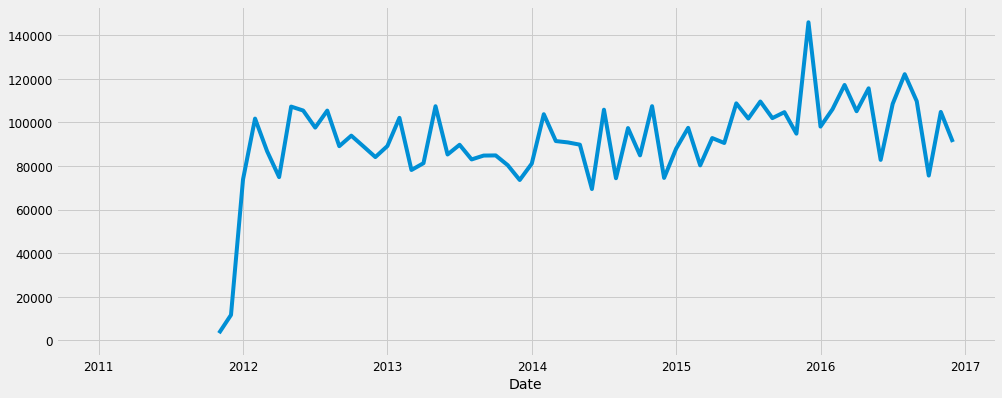

In [72]:
#Visualizing Furniture Sales Time Series Data
y.plot(figsize=(15, 6))
plt.show()


In [359]:
#y.dropna()
y.index[y.isnull()]

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [74]:
y['2016':]

Date
2016-01-01     98072.809524
2016-02-01    106046.409091
2016-03-01    117156.000000
2016-04-01    105116.791667
2016-05-01    115625.500000
2016-06-01     82805.120000
2016-07-01    108479.076923
2016-08-01    122101.296296
2016-09-01    109698.760000
2016-10-01     75609.230769
2016-11-01    104794.791667
2016-12-01     90996.950000
Freq: MS, Name: Order_Demand, dtype: float64

In [82]:
y=y.dropna()

In [83]:
y.shape

(64,)

In [85]:
y.isnull().sum()

0

In [80]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [86]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1622.6815774377915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1292.250626131149
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1192.5665551450757
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:891.0317829852604
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1225.9889511791046
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1223.9967271622593
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:909.8152568755597
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:891.0994026765424
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1560.3585498867108
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1254.365753061094


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1158.3420019574462
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:868.6772519048238
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1297.9451789645132


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1248.9611404240482
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:911.7855637223132


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:868.316576658226
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1407.4066652480542
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1133.486982081043
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1171.2635929846383
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:885.0037160760851
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1154.3958592126874


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1134.5694446252517
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:904.2778452440944
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:872.4251333006295
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1377.7219364901894


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1081.5690349515276
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1134.7677914820624
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:834.5695885068149


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1124.4513735581347
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1082.968741950469


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:890.3387638757672


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:835.7425371024117
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1430.697994539085
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1156.3505266859722
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1177.3883723773974


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:893.1246663516835
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1156.2980207917606
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1158.4778145994221


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:891.2407503867998
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:893.1839721609855


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1399.5792565639326
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1109.161285715582
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1145.0533873135334


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:851.0985799003371
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1130.9668287573088


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1111.1582645805986
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:885.3521996127974


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:851.3925138232083
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1398.3646531727657
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1114.3518467995182
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1151.5197410139567
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:858.613639394116


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1114.317900062178
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1116.21125098694
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:869.0580214841714


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:860.5321110863415
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1379.2047856876002
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1081.0463571257917
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1132.0280623812164


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:831.3376175095609
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1102.3089889642986


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1083.0028040083826
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:865.38711467884


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:832.6530715405146


In [87]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4113      0.314     -1.310      0.190      -1.027       0.204
ma.L1         -0.5650      0.255     -2.213      0.027      -1.065      -0.065
ar.S.L12      -0.3079      0.164     -1.880      0.060      -0.629       0.013
sigma2      4.798e+08   2.58e-10   1.86e+18      0.000     4.8e+08     4.8e+08


C:\Users\p860n111\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


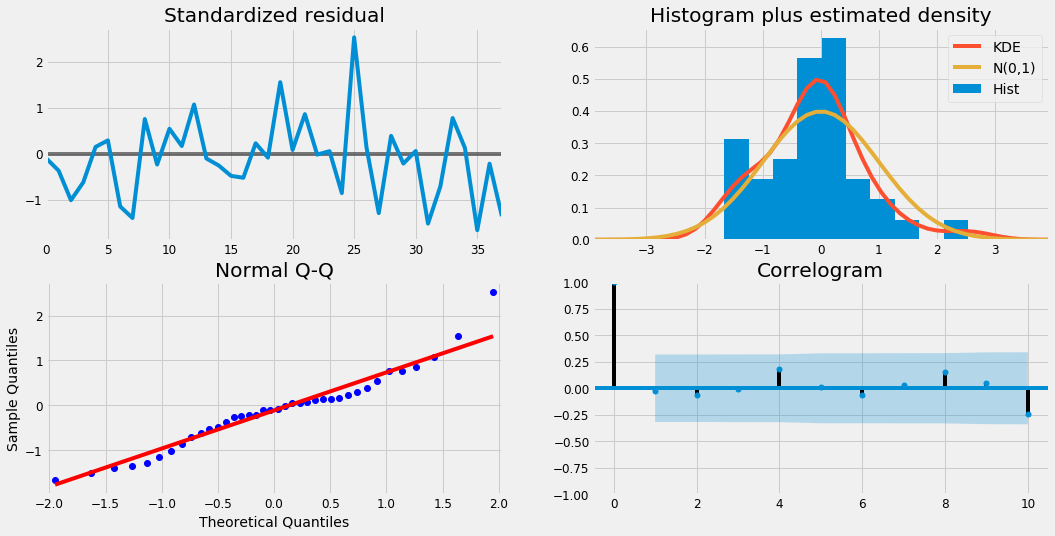

In [88]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

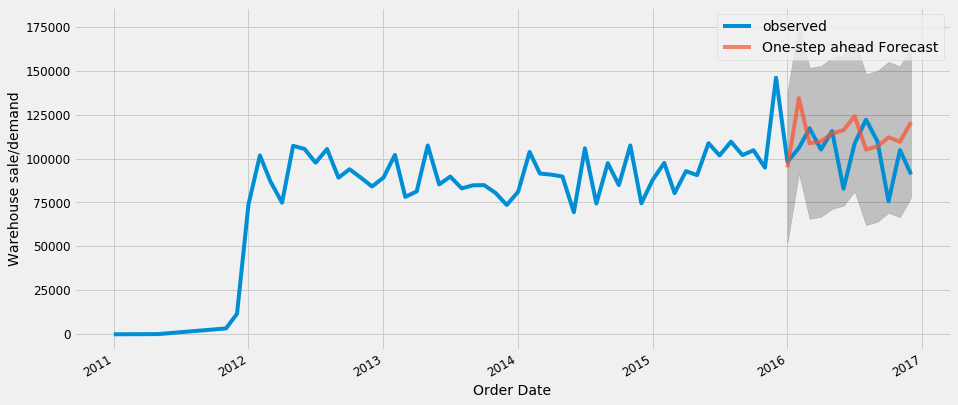

In [121]:
#Validating forecasts

pred = results.get_prediction(start=(52), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Order Date')
ax.set_ylabel('Warehouse sale/demand')
plt.legend()
plt.show()

In [135]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-03':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 434382397.52


In [136]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 20841.84
